# 1. For the 3 labeled images, plot the expert labels for the presence or absence of clouds according to a
map (i.e. use the X, Y coordinates).

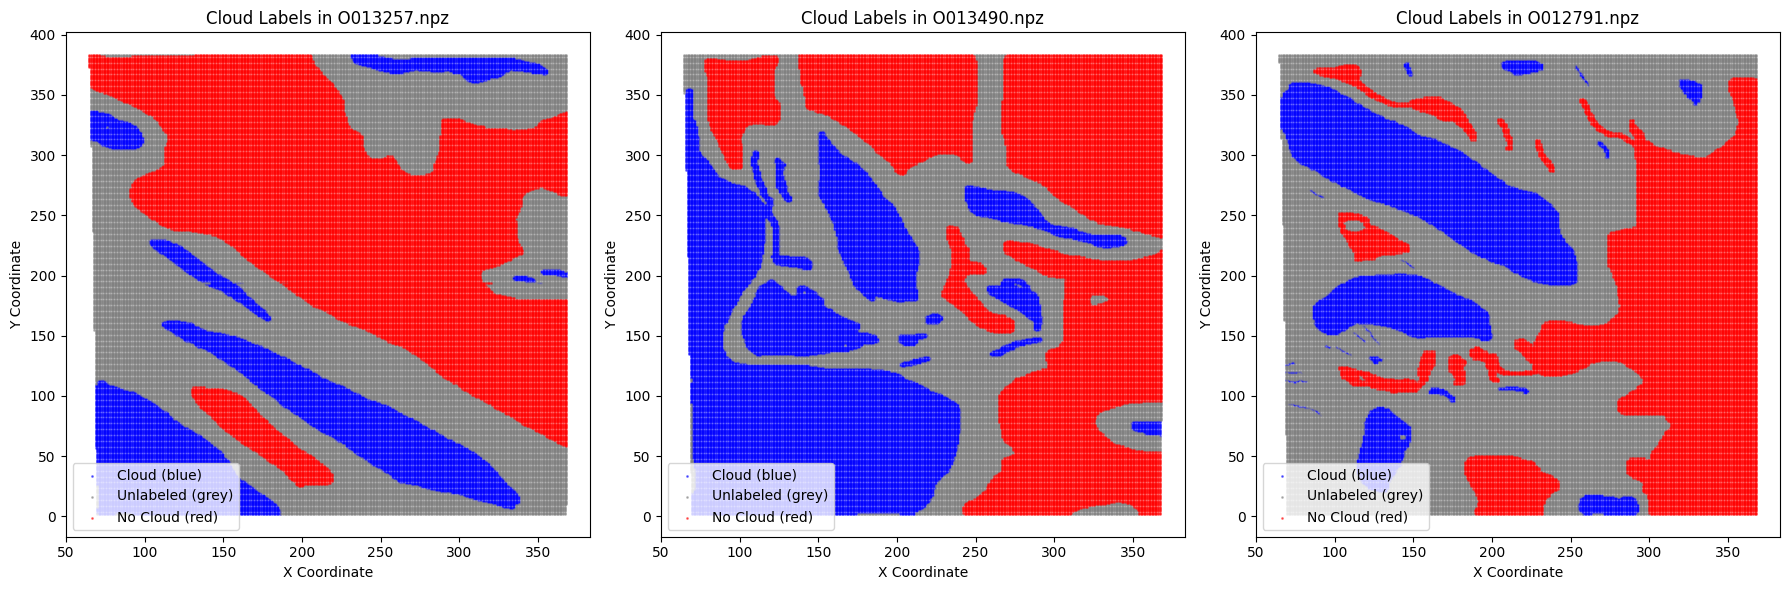

In [9]:
import numpy as np
import matplotlib.pyplot as plt

labeled_files = ["O013257.npz", "O013490.npz", "O012791.npz"]

def plot_cloud_labels(file, ax):
    data = np.load(file)
    arr = data["arr_0"]  
    
    x, y, labels = arr[:, 1], arr[:, 0], arr[:, 10] 

    cloud_mask = labels == 1
    no_cloud_mask = labels == -1 
    cloud_unlabled = labels == 0

    ax.scatter(x[cloud_mask], y[cloud_mask], color='blue', label='Cloud (blue)', alpha=0.5, s=1)
    ax.scatter(x[cloud_unlabled], y[cloud_unlabled], color='grey', label='Unlabeled (grey)', alpha=0.5, s=1)
    ax.scatter(x[no_cloud_mask], y[no_cloud_mask], color='red', label='No Cloud (red)', alpha=0.5, s=1)
    
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.legend()
    ax.set_title(f"Cloud Labels in {file}")

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for each file in the corresponding subplot
for i, file in enumerate(labeled_files):
    plot_cloud_labels(file, axes[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# 2. Explore the relationships between the radiances of different angles, both visually and quantitatively.
Do you notice differences between the two classes (cloud, no cloud) based on the radiances? Are
there differences based on the features (CORR, NDAI, SD)?

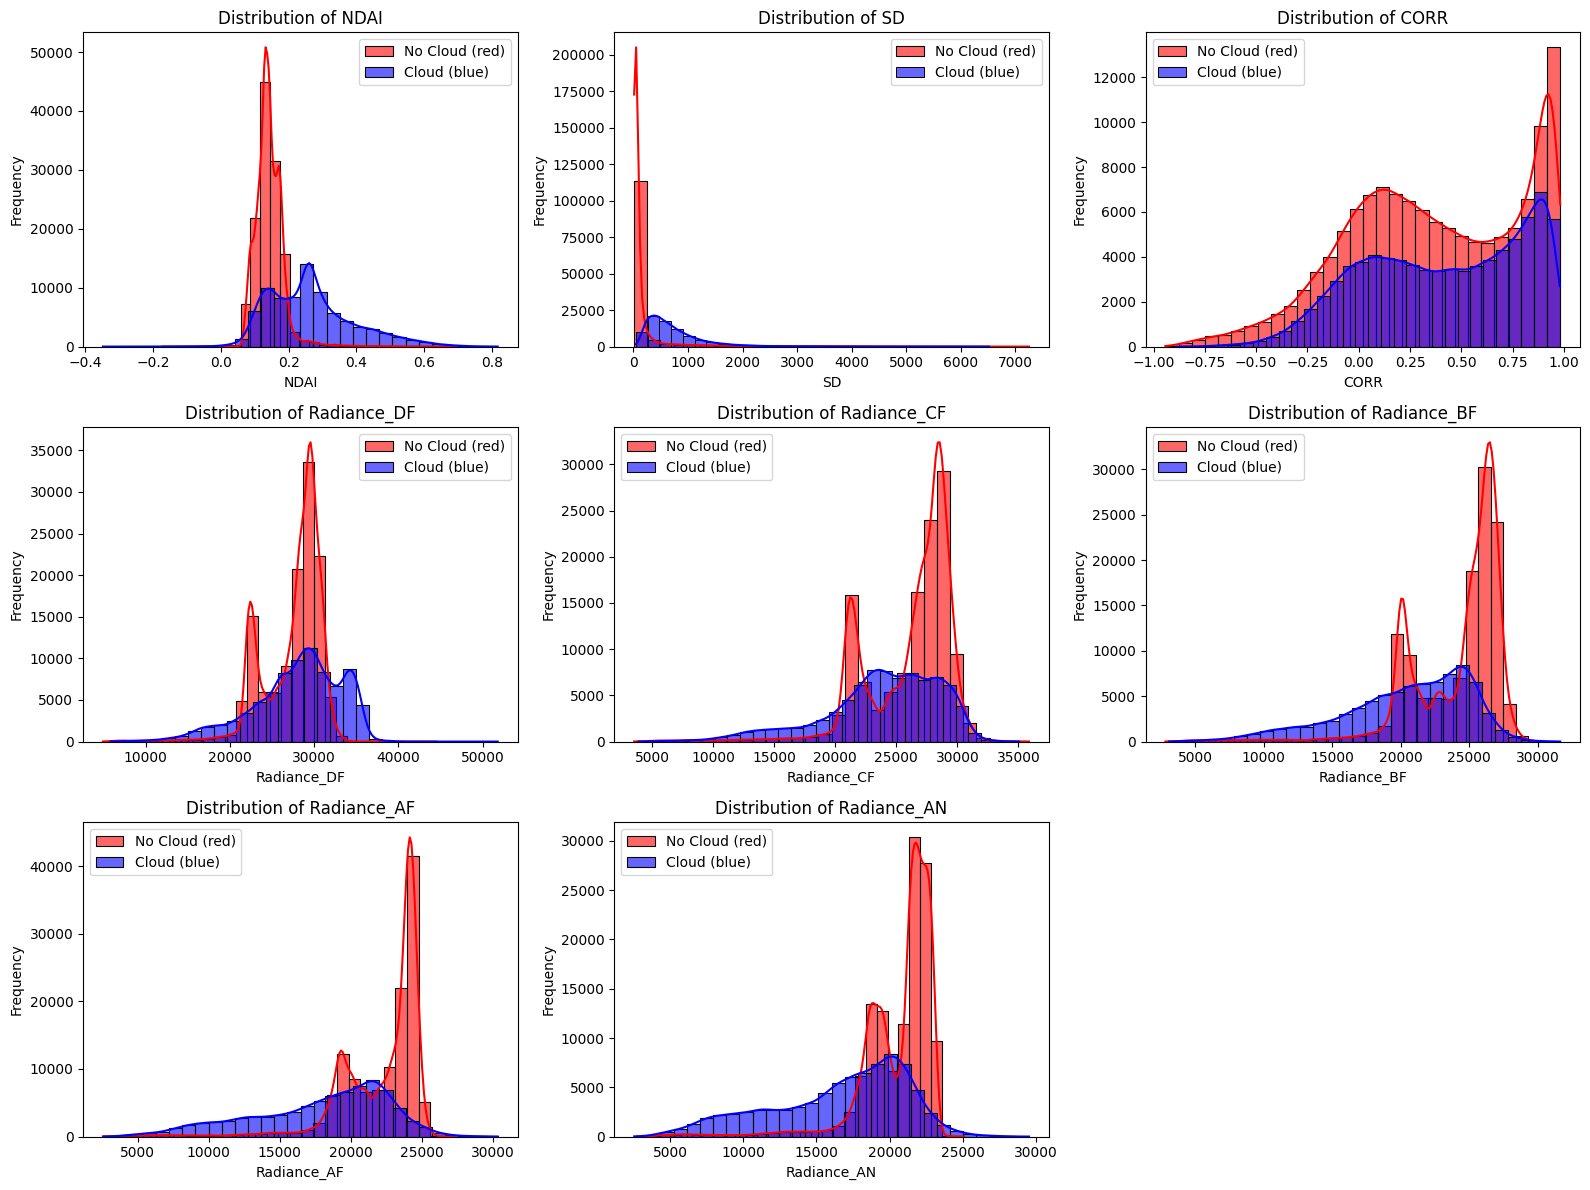

(345005, 11)


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of files to load
labeled_files = ["O013257.npz", "O013490.npz", "O012791.npz"] 

all_data = []  # List to store dataframes from each file

# Load and concatenate data from all files
for file in labeled_files:
    data = np.load(f"/Users/jl/Downloads/image_data/{file}")
    arr = data["arr_0"]
    
    df_3 = pd.DataFrame({
        'Cloud_Label': arr[:, 10],  # Cloud Label
        'y_coordinate': arr[:, 0],  # y coordinate
        'x_coordinate': arr[:, 1],  # x coordinate
        'NDAI': arr[:, 2],  # NDAI
        'SD': arr[:, 3],  # SD
        'CORR': arr[:, 4],  # CORR
        'Radiance_DF': arr[:, 5],  # Radiance angle DF
        'Radiance_CF': arr[:, 6],  # Radiance angle CF
        'Radiance_BF': arr[:, 7],  # Radiance angle BF
        'Radiance_AF': arr[:, 8],  # Radiance angle AF
        'Radiance_AN': arr[:, 9],  # Radiance angle AN
    })
    
    all_data.append(df_3)

# Combine all data into a single DataFrame
df_3 = pd.concat(all_data, ignore_index=True)

# Ensure the Cloud_Label is treated as a categorical type
df_3['Cloud_Label'] = df_3['Cloud_Label'].astype('category')

# List of feature columns to plot the distributions
feature_cols = ['NDAI', 'SD', 'CORR', 'Radiance_DF', 'Radiance_CF', 'Radiance_BF', 'Radiance_AF', 'Radiance_AN']

# Plot the distribution of each feature, separated by Cloud_Label
plt.figure(figsize=(16, 12))
for i, col in enumerate(feature_cols, 1):
    plt.subplot(3, 3, i)
    
    # Plot distribution for Cloud_Label == -1
    sns.histplot(df_3[df_3['Cloud_Label'] == -1][col], kde=True, color='red', bins=30, label='No Cloud (red)', alpha=0.6)
    
    # Plot distribution for Cloud_Label == 1
    sns.histplot(df_3[df_3['Cloud_Label'] == 1][col], kde=True, color='blue', bins=30, label='Cloud (blue)', alpha=0.6)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

print(df_3.shape)  


# Minh's code

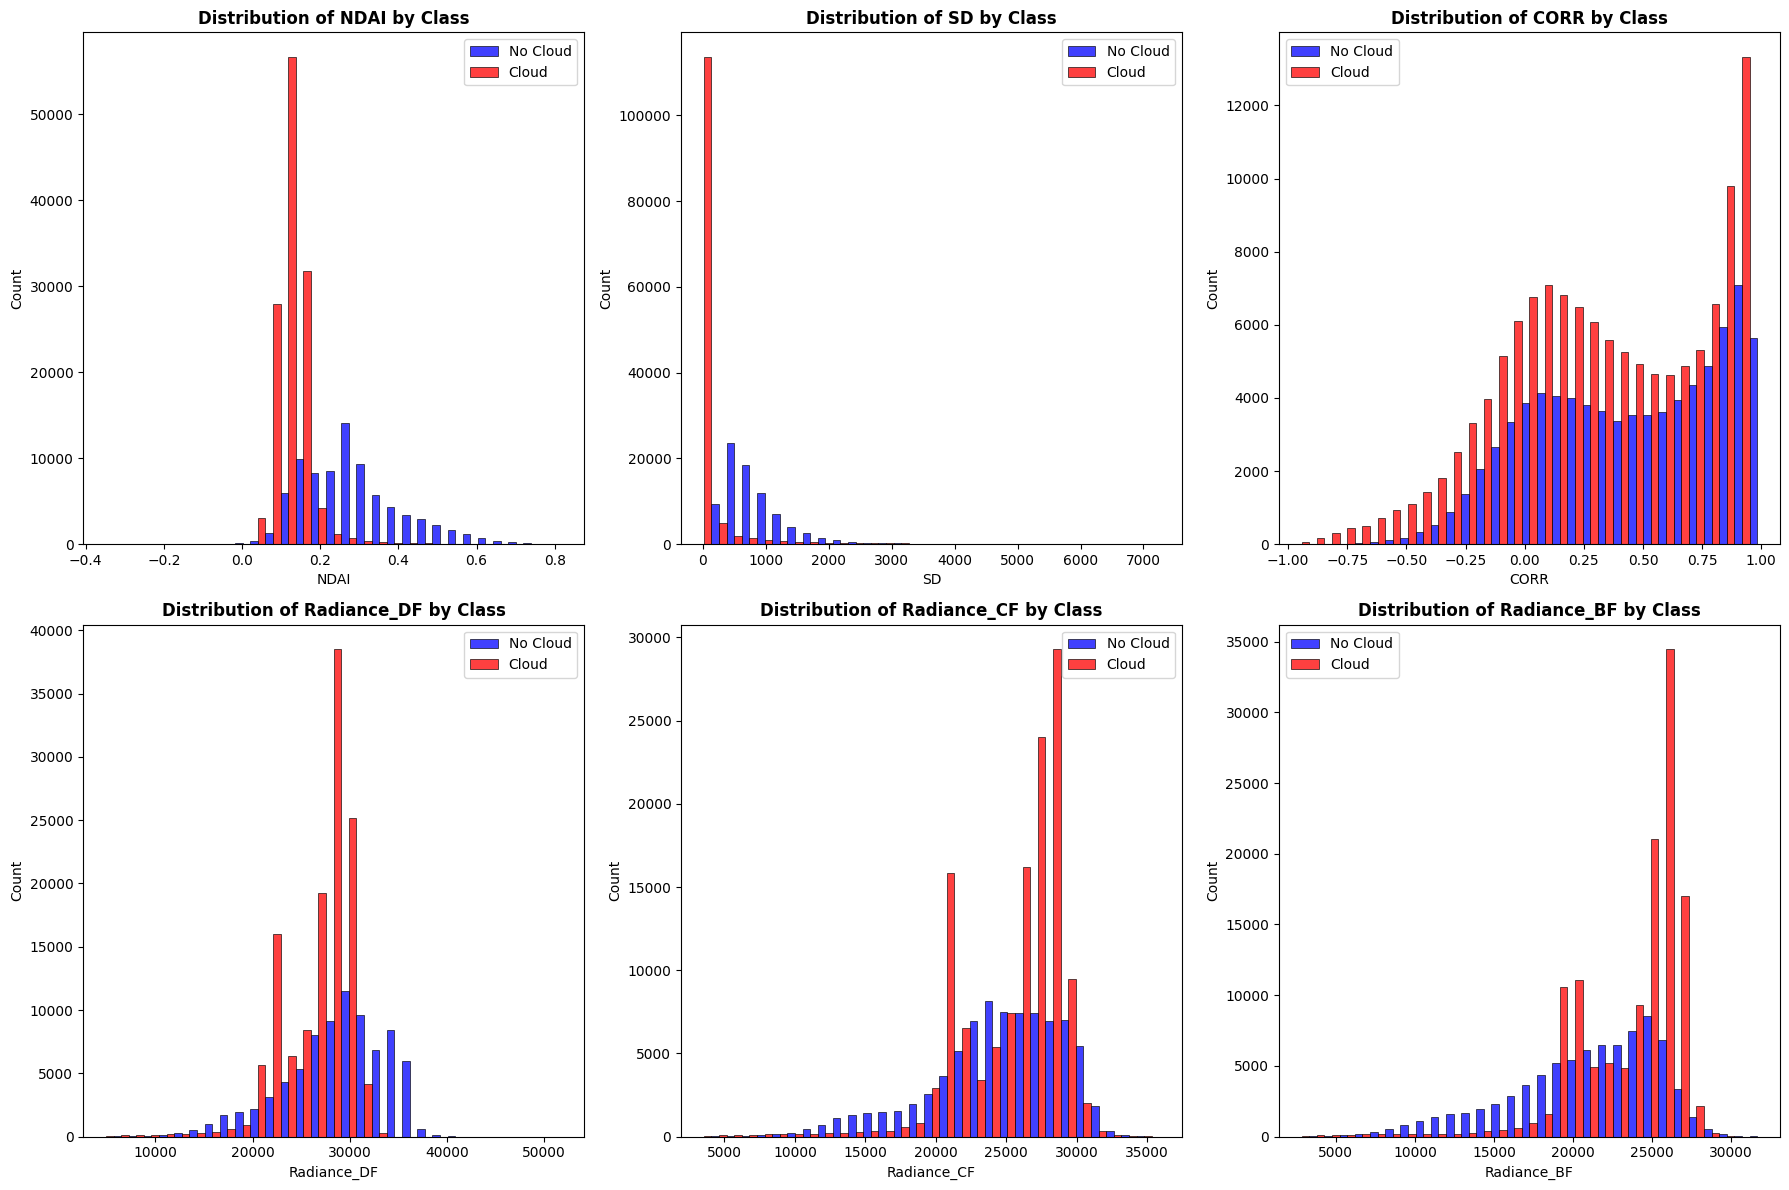

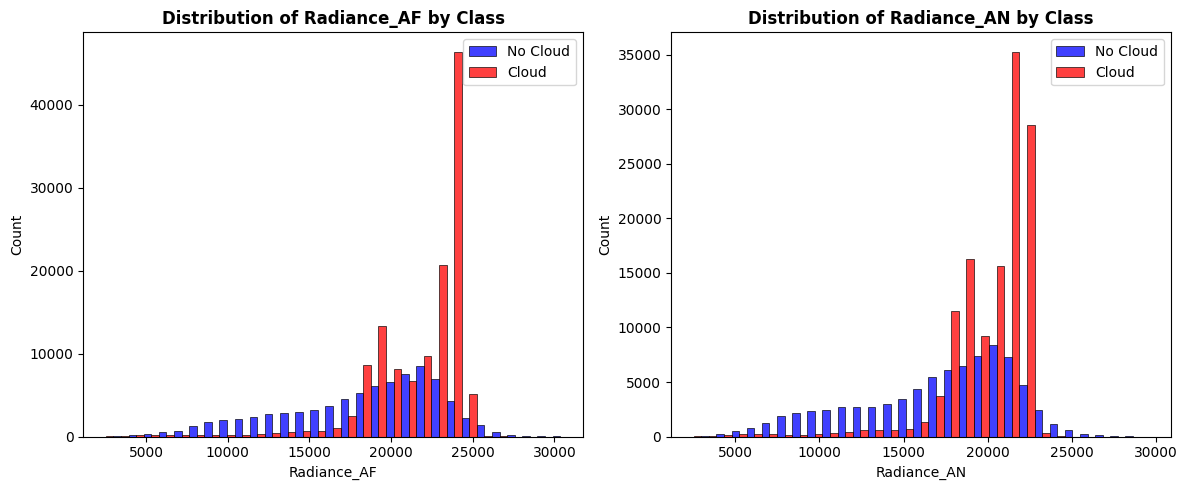

<Figure size 2000x1600 with 0 Axes>

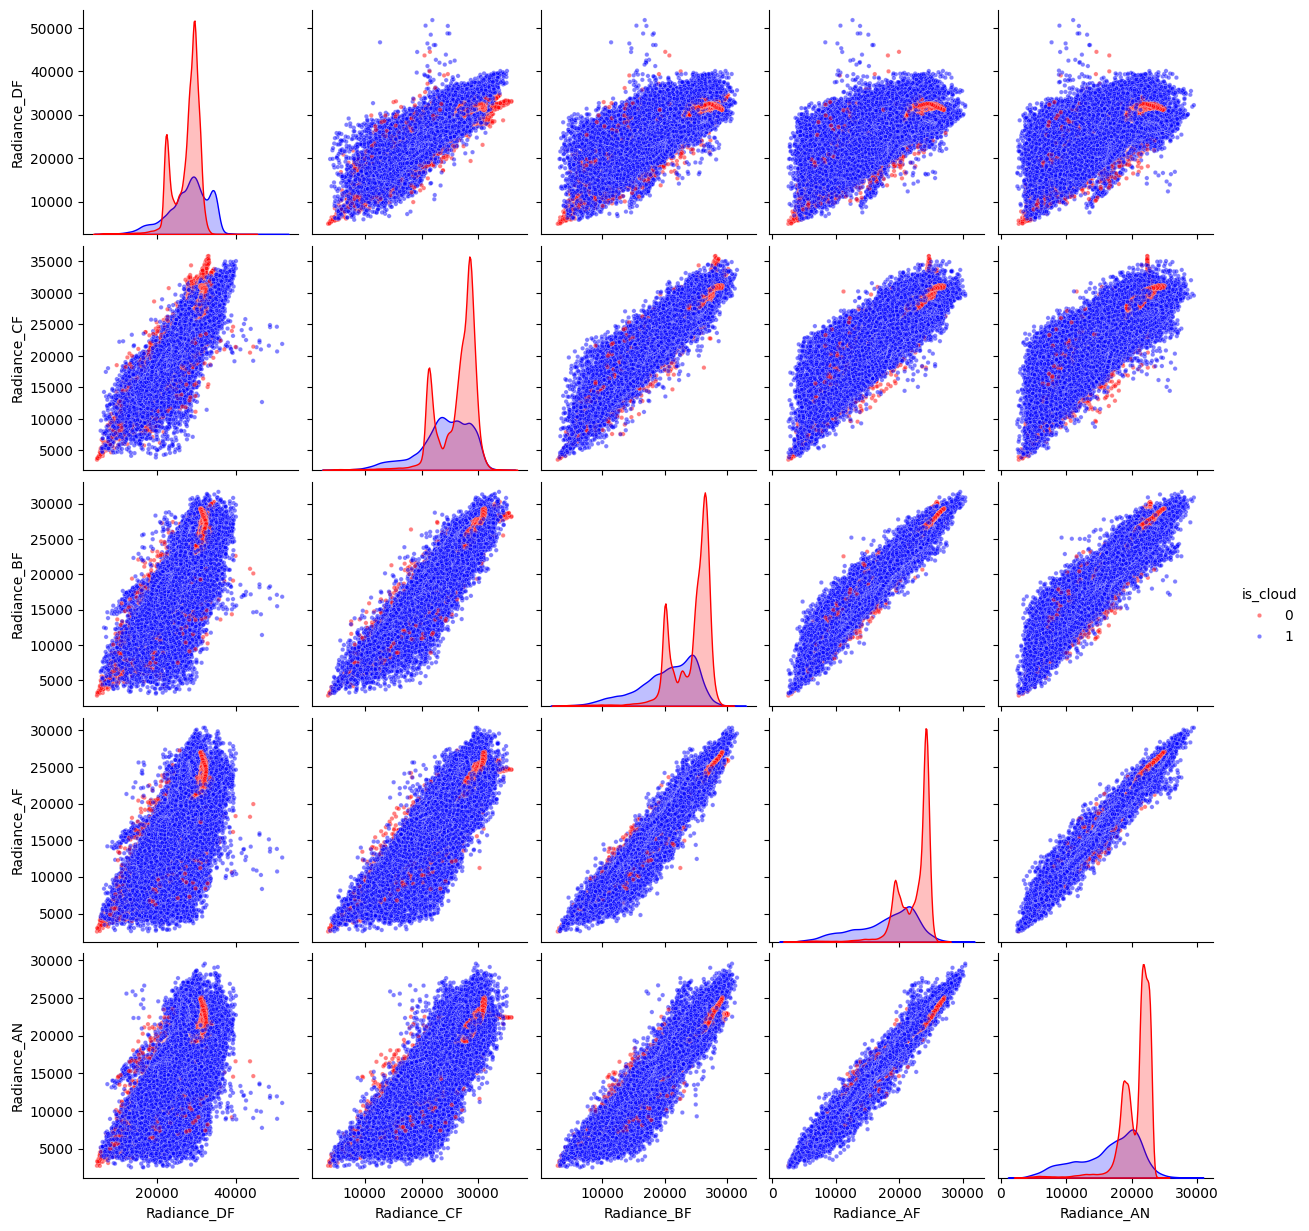

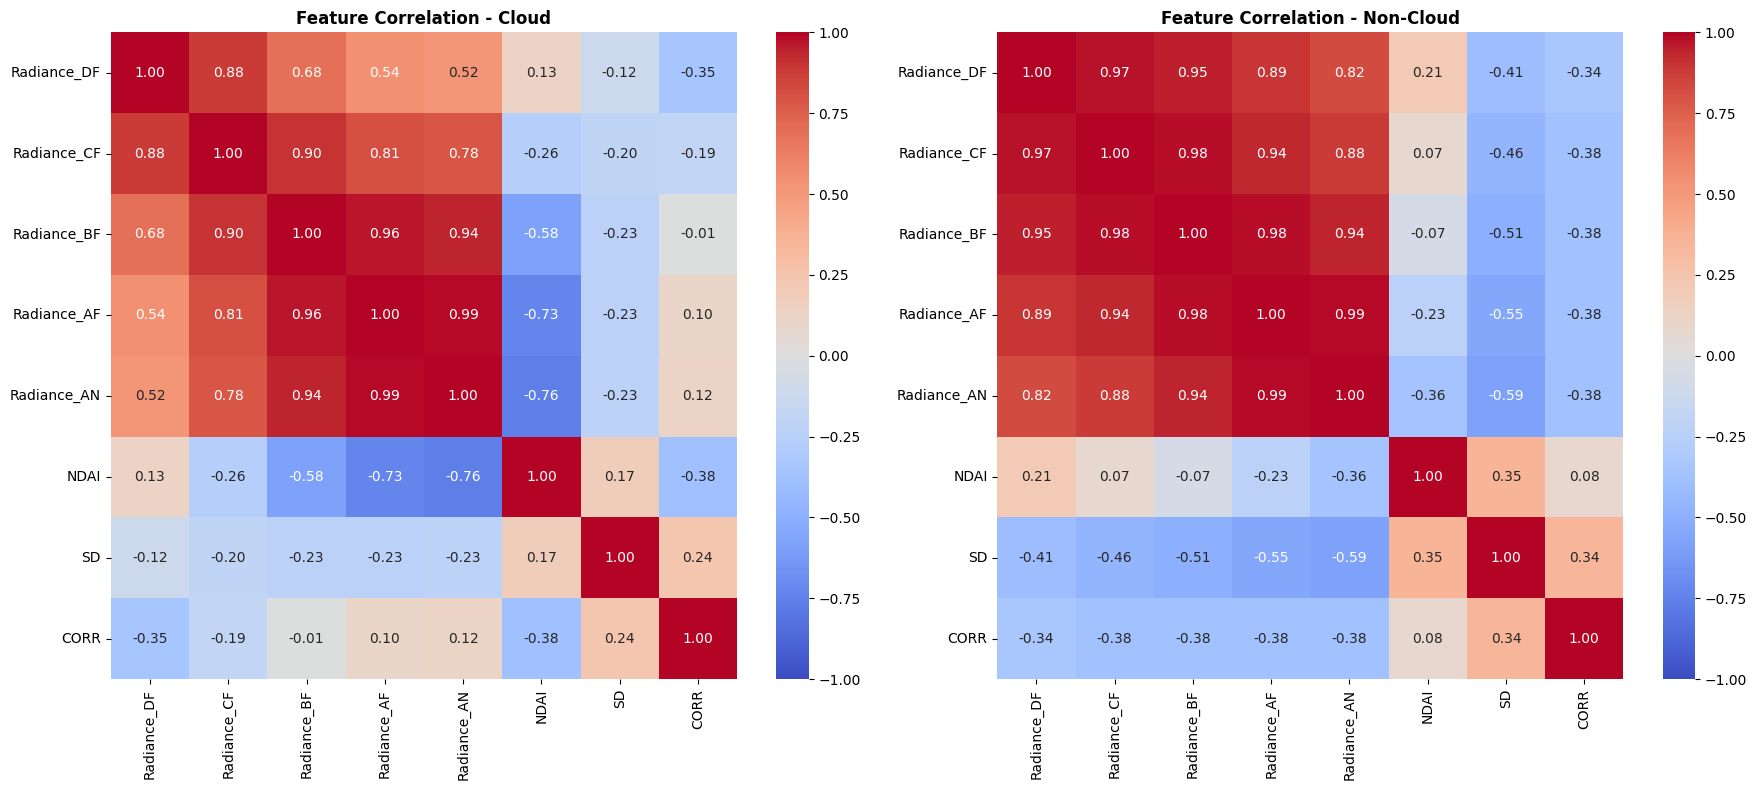

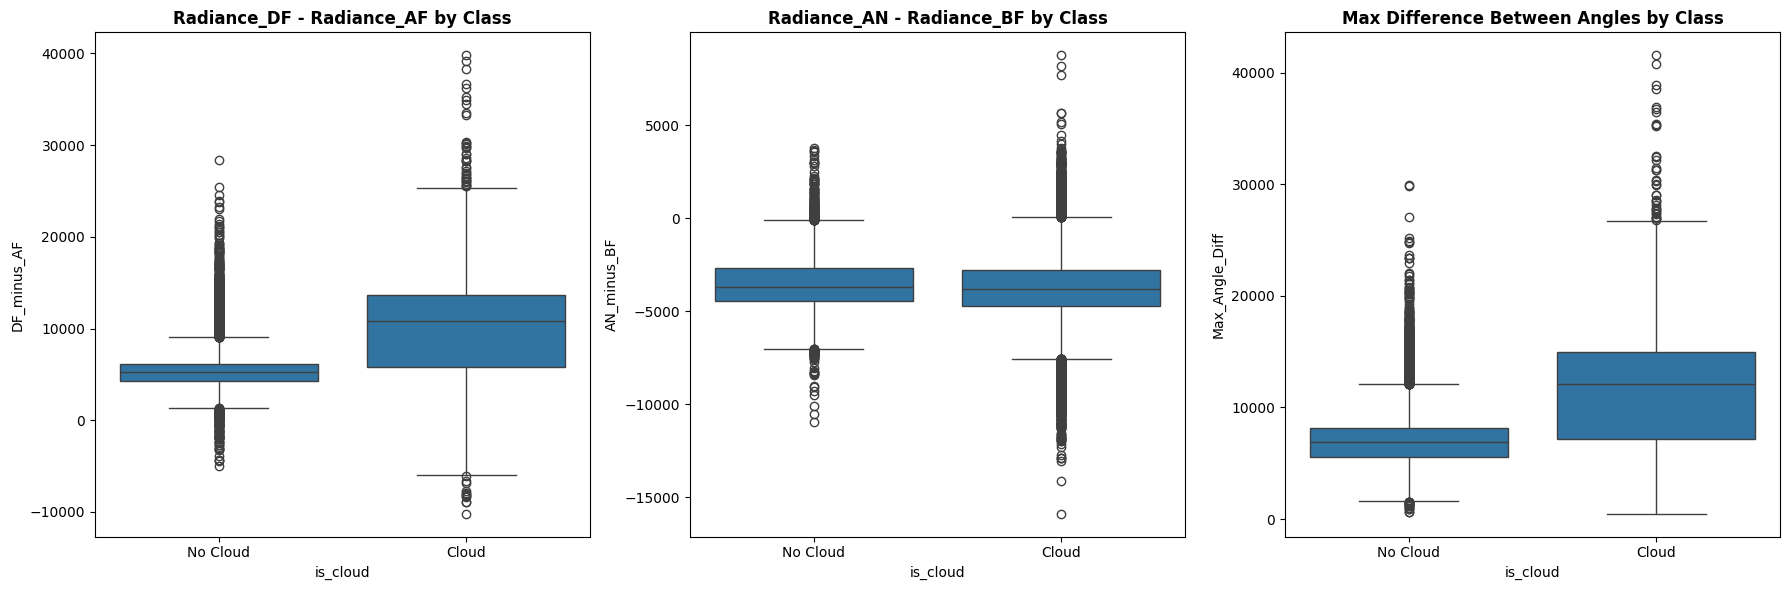

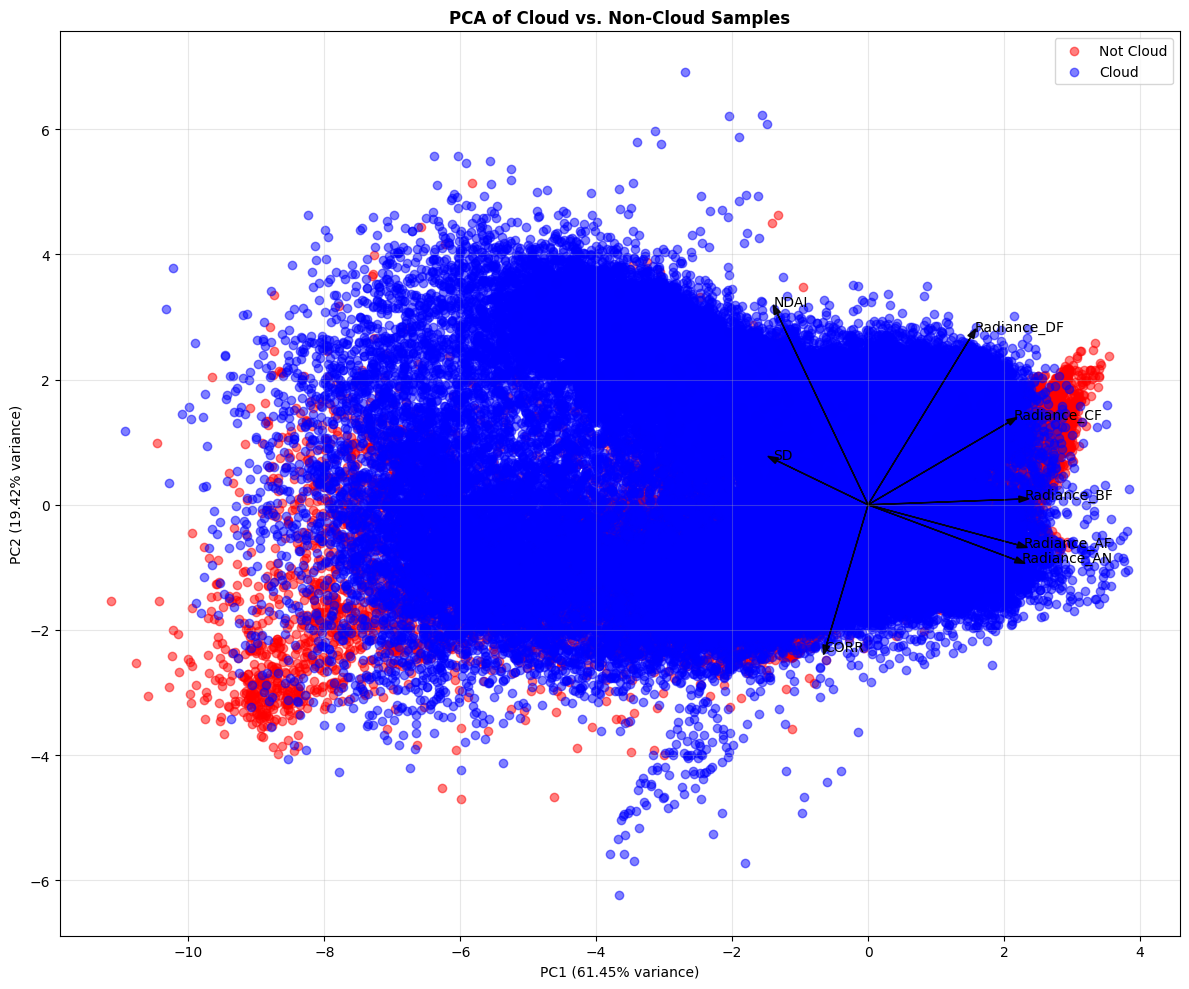

Feature importance based on PCA loadings for PC1:
Radiance_DF: 0.3023
Radiance_CF: 0.4129
Radiance_BF: 0.4438
Radiance_AF: 0.4405
Radiance_AN: 0.4343
NDAI: 0.2671
SD: 0.2684
CORR: 0.1230


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
import os

# File paths for the three labeled images
labeled_files = ["O013257.npz", "O013490.npz", "O012791.npz"]

# Load and combine data from all labeled images
all_data = []

for file_path in labeled_files:
    # Load the image data
    npz_data =  np.load(os.path.join("/users/jl/downloads/image_data", file_path))
    key = list(npz_data.files)[0]
    image_data = npz_data[key]
    
    # Create a DataFrame
    columns = ['y', 'x', 'NDAI', 'SD', 'CORR', 
              'Radiance_DF', 'Radiance_CF', 'Radiance_BF', 
              'Radiance_AF', 'Radiance_AN', 'label']
    
    df = pd.DataFrame(image_data, columns=columns)
    df['image'] = file_path  # Add image identifier
    
    # Only include labeled points
    df = df[(df['label'] == 1) | (df['label'] == -1)]
    
    all_data.append(df)

# Combine all labeled data
combined_data = pd.concat(all_data)

# Create a binary class label for easier visualization
combined_data['is_cloud'] = (combined_data['label'] == 1).astype(int)

# 1. Feature Distributions by Class
plt.figure(figsize=(18, 12))

# Plot histograms for features by class
features = ['NDAI', 'SD', 'CORR']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=combined_data, x=feature, hue='is_cloud', 
                 multiple='dodge', bins=30, 
                 palette={0:'red', 1:'blue'})
    plt.title(f'Distribution of {feature} by Class', fontweight = 'bold')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(['No Cloud', 'Cloud'])

# Plot histograms for radiance angles by class
radiance_angles = ['Radiance_DF', 'Radiance_CF', 'Radiance_BF', 
                  'Radiance_AF', 'Radiance_AN']
for i, angle in enumerate(radiance_angles, 4):
    if i <= 6:  # Only show three in the first figure
        plt.subplot(2, 3, i)
        sns.histplot(data=combined_data, x=angle, hue='is_cloud', 
                     multiple='dodge', bins=30, 
                     palette={0:'red', 1:'blue'})
        plt.title(f'Distribution of {angle} by Class', fontweight = 'bold')
        plt.xlabel(angle)
        plt.ylabel('Count')
        plt.legend(['No Cloud', 'Cloud'])

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300)
plt.show()

# Continue with the remaining radiance angles
plt.figure(figsize=(12, 5))
for i, angle in enumerate(radiance_angles[3:], 1):
    plt.subplot(1, 2, i)
    sns.histplot(data=combined_data, x=angle, hue='is_cloud', 
                 multiple='dodge', bins=30, 
                 palette={0:'red', 1:'blue'})
    plt.title(f'Distribution of {angle} by Class', fontweight = 'bold')
    plt.xlabel(angle)
    plt.ylabel('Count')
    plt.legend(['No Cloud', 'Cloud'])

plt.tight_layout()
plt.savefig('radiance_distributions_2.png', dpi=300)
plt.show()

# 2. Pairwise Relationships - Radiance Angles
plt.figure(figsize=(20, 16))
sns.pairplot(combined_data, vars=radiance_angles, 
             hue='is_cloud', palette={0:'red', 1:'blue'}, 
             diag_kind='kde', plot_kws={'alpha': 0.5, 's': 10})
plt.savefig('radiance_pairplot.png', dpi=300)
plt.show()

# 3. Correlation Analysis
# Separate data by class
cloud_data = combined_data[combined_data['is_cloud'] == 1]
noncloud_data = combined_data[combined_data['is_cloud'] == 0]

# Compute correlation matrices
cloud_corr = cloud_data[radiance_angles + features].corr()
noncloud_corr = noncloud_data[radiance_angles + features].corr()

# Plot correlation matrices
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
sns.heatmap(cloud_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Feature Correlation - Cloud', fontweight = 'bold')

plt.subplot(1, 2, 2)
sns.heatmap(noncloud_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Feature Correlation - Non-Cloud', fontweight = 'bold')

plt.tight_layout()
plt.savefig('correlation_analysis.png', dpi=300)
plt.show()

# 4. Feature Importance Analysis
# Create features specifically showing differences between angles
combined_data['DF_minus_AF'] = combined_data['Radiance_DF'] - combined_data['Radiance_AF']
combined_data['AN_minus_BF'] = combined_data['Radiance_AN'] - combined_data['Radiance_BF']
combined_data['Max_Angle_Diff'] = combined_data[radiance_angles].max(axis=1) - combined_data[radiance_angles].min(axis=1)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='is_cloud', y='DF_minus_AF', data=combined_data)
plt.title('Radiance_DF - Radiance_AF by Class', fontweight = 'bold')
plt.xticks([0, 1], ['No Cloud', 'Cloud'])

plt.subplot(1, 3, 2)
sns.boxplot(x='is_cloud', y='AN_minus_BF', data=combined_data)
plt.title('Radiance_AN - Radiance_BF by Class', fontweight = 'bold')
plt.xticks([0, 1], ['No Cloud', 'Cloud'])

plt.subplot(1, 3, 3)
sns.boxplot(x='is_cloud', y='Max_Angle_Diff', data=combined_data)
plt.title('Max Difference Between Angles by Class', fontweight = 'bold')
plt.xticks([0, 1], ['No Cloud', 'Cloud'])

plt.tight_layout()
plt.savefig('angle_differences.png', dpi=300)
plt.show()

# 5. PCA visualization of the features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select features
X = combined_data[radiance_angles + features].values
y = combined_data['is_cloud'].values

# Standardize data
X_std = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Create PCA plot
plt.figure(figsize=(12, 10))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], alpha=0.5, color='red', label='Not Cloud')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], alpha=0.5, color='blue', label='Cloud')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA of Cloud vs. Non-Cloud Samples', fontweight = 'bold')
plt.legend()
plt.grid(alpha=0.3)

# Add loading vectors
feature_names = radiance_angles + features
loadings = pca.components_.T
for i, (x, y) in enumerate(loadings):
    plt.arrow(0, 0, x*5, y*5, color='k', alpha=0.9, head_width=0.1)
    plt.text(x*5.2, y*5.2, feature_names[i], color='k')

plt.tight_layout()
plt.savefig('pca_visualization.png', dpi=300)
plt.show()

# Print feature importance information
print("Feature importance based on PCA loadings for PC1:")
for i, name in enumerate(feature_names):
    print(f"{name}: {abs(loadings[i, 0]):.4f}")

NDAI           0.466840
SD             0.328004
CORR           0.079694
Radiance_DF    0.039090
Radiance_CF   -0.190372
Radiance_BF   -0.327379
Radiance_AN   -0.379072
Radiance_AF   -0.379099
Name: Cloud_Label, dtype: float64


/var/folders/pk/68fqfn_n2kv8x5n7zxkqhjkm0000gn/T/ipykernel_36462/437691383.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_label_sorted.index, y=correlation_with_label_sorted.values, palette='coolwarm')


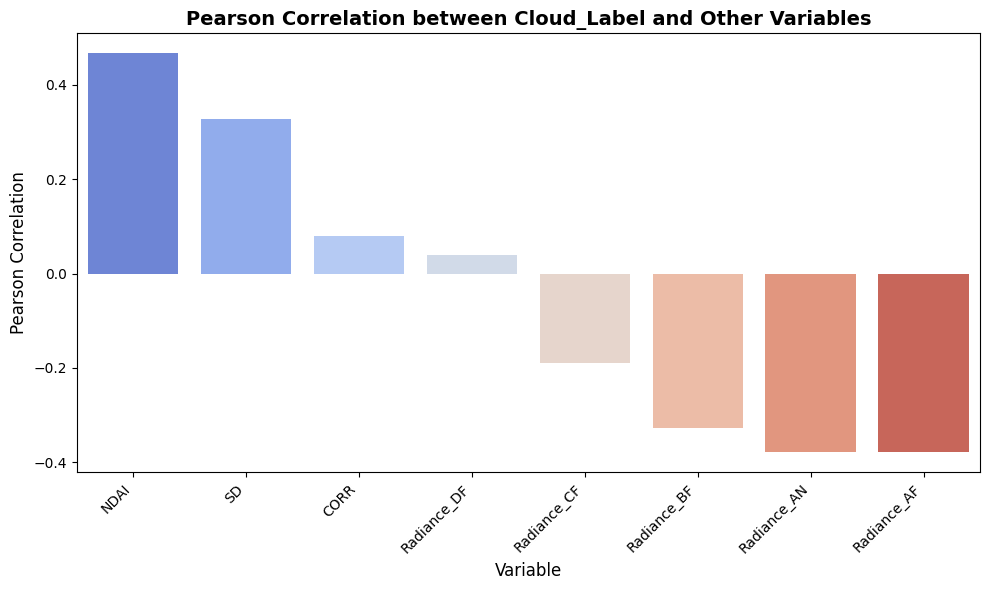

In [18]:
# Select numerical columns for correlation analysis
numeric_cols = ['NDAI', 'SD', 'CORR', 'Radiance_DF', 'Radiance_CF', 'Radiance_BF', 'Radiance_AF', 'Radiance_AN']

# Filter the data for Cloud_Label == -1 and Cloud_Label == 1
df_minus1 = df_3[df_3['Cloud_Label'] == -1]
df_plus1 = df_3[df_3['Cloud_Label'] == 1]

# Compute the correlation matrices
correlation_matrix_minus1 = df_minus1[numeric_cols].corr()
correlation_matrix_plus1 = df_plus1[numeric_cols].corr()

# Plot the correlation heatmaps
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot heatmap for Cloud_Label == -1
sns.heatmap(correlation_matrix_minus1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title('Correlation Heatmap (Cloud_Label = -1)')

# Plot heatmap for Cloud_Label == 1
sns.heatmap(correlation_matrix_plus1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title('Correlation Heatmap (Cloud_Label = 1)')

plt.tight_layout()
plt.show()


# Select the numerical columns along with 'Cloud_Label' for correlation analysis
cols_with_label = ['Cloud_Label'] + numeric_cols

# Compute the Pearson correlation matrix between the columns
correlation_matrix = df_3[cols_with_label].corr(method='pearson')

# Extract correlation values between 'Cloud_Label' and all other columns
correlation_with_label = correlation_matrix['Cloud_Label'].drop('Cloud_Label')  # Drop 'Cloud_Label' from its own correlation

# Sort the correlations in descending order
correlation_with_label_sorted = correlation_with_label.sort_values(ascending=False)

# Display the correlations
print(correlation_with_label_sorted)

# Plot the correlation values as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_label_sorted.index, y=correlation_with_label_sorted.values, palette='coolwarm')
plt.title('Pearson Correlation between Cloud_Label and Other Variables', fontsize=14, fontweight='bold')
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Pearson Correlation', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 3. Split your data into training, validation, and test sets (or training and test, with some cross-validation scheme over the training set). Justify your choice of split based on how it reflects the challenges with possible future applications of your cloud detection algorithm.


In [ ]:
from sklearn.model_selection import train_test_split

df_without0 = df_3.copy()
df_without0 = df_without0[df_without0['Cloud_Label'] != 0]

# Define features and target
X = df_without0[['NDAI', 'SD', 'CORR', 'Radiance_DF', 'Radiance_CF', 'Radiance_BF', 'Radiance_AF', 'Radiance_AN']]  # Features
y = df_without0['Cloud_Label']  # Target (Cloud Label)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Print the shapes of the splits
print(f"train set: {X_train.shape}, validation set: {X_val.shape}, test set: {X_test.shape}")


train set: (166144, 8), validation set: (20768, 8), test set: (20769, 8)


# 4. As is common when dealing with real world data, these images may have imperfections that you’ll need to clean up. 
Recall the skills you developed during Lab 1.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

directory = "/Users/jl/Downloads/image_data"
files = glob.glob(os.path.join(directory, "*.npz"))

# Initialize an empty list to collect all dataframes
all_data = []

# Loop through each file
for file in files:
    data = np.load(file)
    
    arr = data["arr_0"] 
    
    if arr.shape[1] >= 10:
        df = pd.DataFrame({
            'y_coordinate': arr[:, 0],  # y coordinate
            'x_coordinate': arr[:, 1],  # x coordinate
            'NDAI': arr[:, 2],  # NDAI
            'SD': arr[:, 3],  # SD
            'CORR': arr[:, 4],  # CORR
            'Radiance_DF': arr[:, 5],  # Radiance angle DF
            'Radiance_CF': arr[:, 6],  # Radiance angle CF
            'Radiance_BF': arr[:, 7],  # Radiance angle BF
            'Radiance_AF': arr[:, 8],  # Radiance angle AF
            'Radiance_AN': arr[:, 9],  # Radiance angle AN
        })
    else:
  
        print(f"Warning: {file} does not have enough columns (expected at least 11). Skipping file.")
        continue

    all_data.append(df)

full_df_withoutlabel = pd.concat(all_data, ignore_index=True)

print(full_df_withoutlabel.head())

missing_values = full_df_withoutlabel.isnull().sum()
print("Missing values in each column:\n", missing_values)

   y_coordinate  x_coordinate      NDAI           SD      CORR  Radiance_DF  \
0           2.0          69.0  0.611728  1231.908936 -0.489890      22497.5   
1           2.0          70.0  0.390417  1167.525391  0.013988      19543.0   
2           2.0          71.0  0.232648  1558.338867  0.063005      14891.0   
3           2.0          72.0  0.364688   838.619507 -0.122552      16829.5   
4           2.0          73.0  0.418163   555.085022 -0.401255      17152.5   

   Radiance_CF  Radiance_BF  Radiance_AF  Radiance_AN  
0     15601.00     12522.75     13800.00      5419.75  
1     16885.25     16451.75     11294.50      8568.00  
2     17842.00     17484.00      9030.75      9270.00  
3     14699.75     17251.25      9152.00      7834.75  
4     16176.50     19599.75      9025.25      7037.25  
Missing values in each column:
 y_coordinate    0
x_coordinate    0
NDAI            0
SD              0
CORR            0
Radiance_DF     0
Radiance_CF     0
Radiance_BF     0
Radiance_AF  

# Zehao's cleaning

In [11]:
from sklearn.preprocessing import StandardScaler
import os

def loading(filename):
    '''
    Load the data from the given .npz file and return as a DataFrame.
    '''
    data = np.load(filename)
    key = list(data.keys())[0]
    columns = ["y", "x", "NDAI", "SD", "CORR", 
               "Radiance_DF", "Radiance_CF", "Radiance_BF", "Radiance_AF", "Radiance_AN", "Label"]
    df = pd.DataFrame(data[key], columns=columns)
    return df

def remove_outliers_3sig(df, column):
    ''''
    Remove rows with outliers which is defined as values outside 3 standard deviations from the mean.
    '''
    mean_val = df[column].mean()
    std_val = df[column].std()
    lower = mean_val - 3 * std_val
    upper = mean_val + 3 * std_val
    return df[(df[column] >= lower) & (df[column] <= upper)]

def cleaning_preprocessing(df):
    '''
    Preprocess the given DataFrame by removing missing values, duplicates, negative radiance values,
    unlabeled pixels, and outliers. Normalize selected features using StandardScaler.
    '''
    print("Initial data shape:", df.shape)
    print("Missing values per column:\n", df.isnull().sum())
    
    df_clean = df.dropna().copy()
    before = df_clean.shape[0]
    df_clean = df_clean.drop_duplicates()
    after = df_clean.shape[0]
    rad_col = ["Radiance_DF", "Radiance_CF", "Radiance_BF", "Radiance_AF", "Radiance_AN"]
    for col in rad_col:
        negative_num = (df_clean[col] < 0).sum()
        if negative_num > 0:
            print(f"Found {negative_num} negative values in {col}. Removing these rows.")
            df_clean = df_clean[df_clean[col] >= 0]

    # To make sure that we only study labeled pixels, remove rows with Label=0
    df_clean = df_clean[df_clean["Label"] != 0]

    # Remove outliers which are defined as values outside 3 standard deviations from the mean
    for feature in ["SD", "NDAI", "CORR"]:
        before = df_clean.shape[0]
        df_clean = remove_outliers_3sig(df_clean, feature)
        after = df_clean.shape[0]
        print(f"Removed {before - after} rows since it is an outlier in {feature}.")
        feature_cols = rad_col + ["NDAI", "SD", "CORR"]
        stdscaler = StandardScaler()
        df_clean[feature_cols] = stdscaler.fit_transform(df_clean[feature_cols])
    
    print("Final Shape:", df_clean.shape)
    return df_clean

filenames = ["O013257.npz", "O012791.npz", "O013490.npz"]
dataframes = {}

for file in filenames:
    df = loading(file)
    df_clean = cleaning_preprocessing(df)
    dataframes[file] = df_clean
combined_df = pd.concat(dataframes.values(), ignore_index=True)
print("Combined DataFrame shape:", combined_df.shape)


for file, df in dataframes.items():
    base_name = os.path.basename(file) 
    output_name = base_name.replace('.npz', '_cleaned.npz')
    np.savez_compressed(output_name, data=df.to_numpy())
    print(f"Saved cleaned data to {output_name}")

Initial data shape: (115000, 11)
Missing values per column:
 y              0
x              0
NDAI           0
SD             0
CORR           0
Radiance_DF    0
Radiance_CF    0
Radiance_BF    0
Radiance_AF    0
Radiance_AN    0
Label          0
dtype: int64
Removed 1572 rows since it is an outlier in SD.
Removed 2080 rows since it is an outlier in NDAI.
Removed 68 rows since it is an outlier in CORR.
Final Shape: (67106, 11)
Initial data shape: (114973, 11)
Missing values per column:
 y              0
x              0
NDAI           0
SD             0
CORR           0
Radiance_DF    0
Radiance_CF    0
Radiance_BF    0
Radiance_AF    0
Radiance_AN    0
Label          0
dtype: int64
Removed 1378 rows since it is an outlier in SD.
Removed 751 rows since it is an outlier in NDAI.
Removed 72 rows since it is an outlier in CORR.
Final Shape: (52571, 11)
Initial data shape: (115032, 11)
Missing values per column:
 y              0
x              0
NDAI           0
SD             0
CORR    

In [12]:
df_clean

,y,x,NDAI,SD,CORR,Radiance_DF,Radiance_CF,Radiance_BF,Radiance_AF,Radiance_AN,Label
0,2.0,70.0,1.996601,0.453235,-0.385670,0.242844,-0.638289,-1.332759,-1.610332,-1.773099,1.0
1,2.0,71.0,1.925685,1.028928,-0.331011,0.223620,-0.829492,-1.330180,-1.533041,-1.724212,1.0
2,2.0,72.0,1.939010,0.770979,-0.232759,0.183630,-0.820012,-1.295725,-1.675662,-1.746296,1.0
3,2.0,73.0,1.914341,0.137902,-0.367562,0.310937,-0.662499,-1.291181,-1.602151,-1.689484,1.0
4,2.0,74.0,1.963253,0.110280,-0.579203,0.280780,-0.763060,-1.370039,-1.539867,-1.736390,1.0
...,...,...,...,...,...,...,...,...,...,...,...
115027,383.0,364.0,-0.857865,-0.835578,0.482323,0.204909,0.858666,0.995042,1.036401,1.023184,-1.0
115028,383.0,365.0,-0.832841,-0.821255,0.058651,0.284595,0.941141,1.040122,1.050505,1.039440,-1.0
115029,383.0,366.0,-0.801660,-0.858307,0.007528,0.352174,1.025075,1.042210,1.059814,1.040198,-1.0
115030,383.0,367.0,-0.811545,-0.858653,-0.206456,0.330895,0.979790,1.002474,1.041817,1.040081,-1.0


# Part 2

       Feature  Importance
1           SD    0.410820
7  Radiance_AN    0.104861
0         NDAI    0.098036
2         CORR    0.090998
6  Radiance_AF    0.083597
5  Radiance_BF    0.082663
3  Radiance_DF    0.082105
4  Radiance_CF    0.046920


/var/folders/pk/68fqfn_n2kv8x5n7zxkqhjkm0000gn/T/ipykernel_81873/2397456106.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Importance', x='Feature', data=importance_df, palette="viridis")


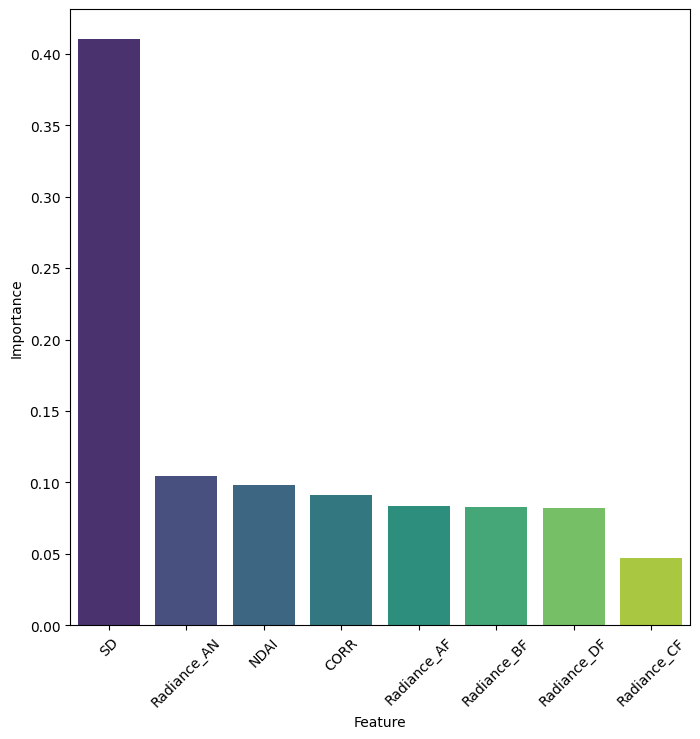

In [17]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

from sklearn.model_selection import train_test_split

feature_cols = ['NDAI', 'SD', 'CORR', 'Radiance_DF', 'Radiance_CF', 'Radiance_BF', 'Radiance_AF', 'Radiance_AN']
X = combined_df[feature_cols] 
y = combined_df['Label']  

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

feature_importance = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': feature_importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

import matplotlib.pyplot as plt


plt.figure(figsize=(8, 8))
sns.barplot(y='Importance', x='Feature', data=importance_df, palette="viridis")  
plt.xticks(rotation=45) 
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()




In [31]:
import numpy as np
import pandas as pd

def make_data(patch_size, df_without0, labeled_files):
    """
    Processes the data, generates patches from the image, and computes texture contrast for each patch.
    
    Parameters:
    patch_size (int): The size of the patch to be generated (side length of square patch).
    df_without0 (DataFrame): The DataFrame containing the coordinates for patch extraction.
    labeled_files (list): List of labeled .npz image files.
    
    Returns:
    DataFrame: The DataFrame with the computed texture contrast feature added, including the generated patches.
    """
    patches = []  # List to store the generated patches
    texture_contrast_list = []  # List to store computed texture contrast values for each patch

    all_data = []  # List to store dataframes from each file

    # Load and concatenate data from all files
    for file in labeled_files:
        data = np.load(f"/Users/jl/Downloads/image_data/{file}")  # Load the .npz file
        
        # Check available data keys to understand the structure of the file
        print(f"Files in {file}: {data.files}")
        
        # Assuming 'arr_0' contains the image data
        arr = data['arr_0']  # Load the image data array
        
        # Convert the data to a DataFrame for easier processing
        file_data = pd.DataFrame({
            'Cloud_Label': arr[:, 10],  # Cloud Label (1 for cloud, -1 for not cloud, 0 for unlabeled)
            'y_coordinate': arr[:, 0],  # y coordinate
            'x_coordinate': arr[:, 1],  # x coordinate
            'NDAI': arr[:, 2],  # NDAI
            'SD': arr[:, 3],  # SD (Standard Deviation)
            'CORR': arr[:, 4],  # CORR (Correlation)
            'Radiance_DF': arr[:, 5],  # Radiance angle DF
            'Radiance_CF': arr[:, 6],  # Radiance angle CF
            'Radiance_BF': arr[:, 7],  # Radiance angle BF
            'Radiance_AF': arr[:, 8],  # Radiance angle AF
            'Radiance_AN': arr[:, 9],  # Radiance angle AN
        })
        
        all_data.append(file_data)
    
    # Concatenate all data into a single DataFrame
    data = pd.concat(all_data, ignore_index=True)

    # Iterate through each row in df_without0 to extract patches
    for i, row in df_without0.iterrows():
        y = row['y_coordinate']  # Extract y coordinate
        x = row['x_coordinate']  # Extract x coordinate
        
        # Load the image data for each file
        for file in labeled_files:
            data = np.load(f"/Users/jl/Downloads/image_data/{file}")
            arr = data['arr_0']
            
            # Extract each channel (NDAI, SD, CORR, Radiance angles) from the image data
            nda_data = arr[:, 2]  # NDAI channel
            sd_data = arr[:, 3]   # SD channel
            corr_data = arr[:, 4] # CORR channel
            radiance_d = arr[:, 5]  # Radiance angle DF
            radiance_c = arr[:, 6]  # Radiance angle CF
            radiance_b = arr[:, 7]  # Radiance angle BF
            radiance_a = arr[:, 8]  # Radiance angle AF
            radiance_n = arr[:, 9]  # Radiance angle AN
            
            # Ensure the patch does not extend beyond the image boundary
            y_start = max(0, y - patch_size // 2)  # Calculate the start point for y (upper bound)
            y_end = min(nda_data.shape[0], y + patch_size // 2)  # Calculate the end point for y (lower bound)
            x_start = max(0, x - patch_size // 2)  # Calculate the start point for x (left bound)
            x_end = min(nda_data.shape[1], x + patch_size // 2)  # Calculate the end point for x (right bound)
            
            # Stack all channels to create a multi-channel patch
            patch = np.stack([
                nda_data[y_start:y_end, x_start:x_end],  # Extract patch for NDAI
                sd_data[y_start:y_end, x_start:x_end],   # Extract patch for SD
                corr_data[y_start:y_end, x_start:x_end], # Extract patch for CORR
                radiance_d[y_start:y_end, x_start:x_end],  # Extract patch for Radiance DF
                radiance_c[y_start:y_end, x_start:x_end],  # Extract patch for Radiance CF
                radiance_b[y_start:y_end, x_start:x_end],  # Extract patch for Radiance BF
                radiance_a[y_start:y_end, x_start:x_end],  # Extract patch for Radiance AF
                radiance_n[y_start:y_end, x_start:x_end]   # Extract patch for Radiance AN
            ])  # Create a multi-channel patch (shape: channels x height x width)
            
            # Compute texture contrast for the patch (this function is defined elsewhere in your code)
            contrast = compute_texture_contrast(patch)
            
            # Store the generated patch and its computed texture contrast
            patches.append(patch)
            texture_contrast_list.append(contrast)
    
    # Add the generated patches and texture contrast values to the DataFrame
    df_without0['patches'] = patches
    df_without0['texture_contrast'] = texture_contrast_list
    
    return df_without0

# Example usage: Printing the first few rows of the DataFrame with the patches and texture contrast
print(df_without0.head(5))


  Cloud_Label  y_coordinate  x_coordinate      NDAI           SD      CORR  \
1         1.0           2.0          71.0  0.593831  1169.416504  0.473416   
2         1.0           2.0          72.0  0.550953  1376.460571  0.861363   
3         1.0           2.0          73.0  0.550160  1389.984863  0.687417   
4         1.0           2.0          74.0  0.615813  1388.641357  0.486022   
5         1.0           2.0          75.0  0.599688  1648.248657  0.766353   

   Radiance_DF  Radiance_CF  Radiance_BF  Radiance_AF  Radiance_AN  \
1     23461.00     18388.50     11575.25      8993.25      5978.75   
2     23831.75     16752.50     12560.25      9570.75      6900.00   
3     23185.75     15590.75     14639.50      8372.50      6728.25   
4     23047.75     16095.25     12771.50      7136.00      5480.00   
5     23816.75     16542.50     11906.00      6817.25      5960.00   

                                             patches  texture_contrast  
1  [[[0.1554518708824254, 0.393376433

# Autoencoder

In [32]:
# Define the Autoencoder class

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

class Autoencoder(nn.Module):
    def __init__(self, latent_dim=32):  
        super(Autoencoder, self).__init__()
        
        # Encoder network: Compress the input into a smaller latent representation
        self.encoder = nn.Sequential(
            nn.Linear(9*9*8, 256),  # First fully connected layer to reduce input size
            nn.ReLU(),  # Activation function to add non-linearity
            nn.BatchNorm1d(256),  # Batch normalization to stabilize training
            nn.Linear(256, 128),  # Second fully connected layer to further reduce dimensions
            nn.ReLU(),  # Activation function
            nn.BatchNorm1d(128),  # Batch normalization
            nn.Linear(128, latent_dim)  # Output layer to get the latent representation
        )
        
        # Decoder network: Reconstruct the input from the latent representation
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),  # First fully connected layer to upsample the latent representation
            nn.ReLU(),  # Activation function
            nn.Linear(128, 256),  # Second fully connected layer to increase the size
            nn.ReLU(),  # Activation function
            nn.Linear(256, 9*9*8),  # Output layer to match the original input size
            nn.Sigmoid()  # Sigmoid activation to ensure outputs are in the range [0, 1]
        )
    
    def forward(self, x):
        # Forward pass: Encoder followed by Decoder
        latent = self.encoder(x)  # Obtain the latent representation
        reconstructed = self.decoder(latent)  # Reconstruct the input from the latent representation
        return reconstructed


# Create dummy datasets (unlabeled and labeled)
unlabeled_data = torch.randn(10000, 9*9*8)  # Randomly generated unlabeled data (10000 samples)
labeled_data = torch.randn(500, 9*9*8)  # Randomly generated labeled data (500 samples)

# (3) Define DataLoader for batching the data
train_loader = data.DataLoader(unlabeled_data, batch_size=64, shuffle=True)  # DataLoader for unlabeled data
fine_tune_loader = data.DataLoader(labeled_data, batch_size=64, shuffle=True)  # DataLoader for labeled data (fine-tuning)

# (4) Model and Training Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available, else CPU
autoencoder = Autoencoder().to(device)  # Initialize the Autoencoder model and move it to the device
criterion = nn.MSELoss()  # Mean Squared Error loss to measure reconstruction error
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)  # Adam optimizer with learning rate 1e-3
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.5, verbose=True)  # Learning rate scheduler

# (5) Pre-training the Autoencoder with Unlabeled Data
num_epochs = 20  # Number of epochs for pre-training
for epoch in range(num_epochs):
    autoencoder.train()  # Set the model to training mode
    epoch_loss = 0  # Initialize epoch loss to track the average loss
    
    for batch in train_loader:
        batch = batch.to(device)  # Move the batch to the appropriate device (GPU/CPU)
        optimizer.zero_grad()  # Zero the gradients of the model parameters
        outputs = autoencoder(batch)  # Pass the batch through the autoencoder (forward pass)
        loss = criterion(outputs, batch)  # Compute the reconstruction error (MSE loss)
        loss.backward()  # Backpropagate the error
        optimizer.step()  # Update the model parameters based on the gradients
        epoch_loss += loss.item()  # Accumulate loss
    
    # Print the average loss for the current epoch
    print(f"Epoch {epoch+1}, Loss: {epoch_loss / len(train_loader)}")
    scheduler.step(epoch_loss)  # Step the learning rate scheduler based on the epoch loss

# (6) Fine-tuning the Autoencoder with Labeled Data
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-4)  # Reduce learning rate for fine-tuning (1e-4)
for epoch in range(10):  # Fine-tuning for 10 epochs
    autoencoder.train()  # Set the model to training mode
    epoch_loss = 0  # Initialize epoch loss to track the average loss
    
    for batch in fine_tune_loader:
        batch = batch.to(device)  # Move the batch to the appropriate device (GPU/CPU)
        optimizer.zero_grad()  # Zero the gradients of the model parameters
        outputs = autoencoder(batch)  # Pass the batch through the autoencoder (forward pass)
        loss = criterion(outputs, batch)  # Compute the reconstruction error (MSE loss)
        loss.backward()  # Backpropagate the error
        optimizer.step()  # Update the model parameters based on the gradients
        epoch_loss += loss.item()  # Accumulate loss
    
    # Print the average loss for the current fine-tuning epoch
    print(f"Fine-tuning Epoch {epoch+1}, Loss: {epoch_loss / len(fine_tune_loader)}")

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1, Loss: 1.0189086870782693
Epoch 2, Loss: 1.0000510864956365
Epoch 3, Loss: 0.9997887174794629
Epoch 4, Loss: 0.999056995294656
Epoch 5, Loss: 0.9961353806173725
Epoch 6, Loss: 0.9918641998509693
Epoch 7, Loss: 0.9884978293613264
Epoch 8, Loss: 0.9855581294199464
Epoch 9, Loss: 0.9830953232042349
Epoch 10, Loss: 0.9805235691890595
Epoch 11, Loss: 0.9781165878484204
Epoch 12, Loss: 0.9755548747481814
Epoch 13, Loss: 0.9733681515523582
Epoch 14, Loss: 0.9710804239200179
Epoch 15, Loss: 0.9689714737758515
Epoch 16, Loss: 0.9668676036937981
Epoch 17, Loss: 0.9648331783379719
Epoch 18, Loss: 0.9627207179737699
Epoch 19, Loss: 0.9608487361555647
Epoch 20, Loss: 0.9594524840640414
Fine-tuning Epoch 1, Loss: 0.9926204085350037
Fine-tuning Epoch 2, Loss: 0.988983079791069
Fine-tuning Epoch 3, Loss: 0.9865737631917
Fine-tuning Epoch 4, Loss: 0.9849932715296745
Fine-tuning Epoch 5, Loss: 0.982877179980278
Fine-tuning Epoch 6, Loss: 0.9816246405243874
Fine-tuning Epoch 7, Loss: 0.9802929833